ML Cycle steps 
Problem Statement,
Data Collection,
Data Cleaning and preprocessing,
EDA ,
Feature Engineering and feature selection,
model selection ,
Training and testing model , 
hyper tunning and a model deployment,  
model evaluation ,
model montoring and mainteance .

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [156]:
data = pd.read_csv('Dataset/Housing.csv')

In [157]:
data.shape

(545, 13)

In [158]:
data.head(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [160]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [161]:
data.shape

(545, 13)

In [162]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [163]:
data.furnishingstatus.value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

All object made for Preprocessing

In [164]:
ol = OrdinalEncoder()
le = LabelEncoder()
ohe = OneHotEncoder(sparse_output = False , drop='first' , dtype=int)
mms = MinMaxScaler()
std = StandardScaler()

In [165]:
data[['mainroad','guestroom','basement','hotwaterheating','airconditioning' , 'prefarea']] = ohe.fit_transform(data[['mainroad','guestroom','basement','hotwaterheating','airconditioning' , 'prefarea']])

In [166]:
data['furnishingstatus'] = le.fit_transform(data['furnishingstatus'])

In [167]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [168]:
data[['price','area']]=  mms.fit_transform(data[['price', 'area']])

In [169]:
data.shape

(545, 13)

In [170]:
data.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,4,2,3,1,0,0,0,1,2,1,0
1,0.909091,0.502405,4,4,4,1,0,0,0,1,3,0,0
2,0.909091,0.571134,3,2,2,1,0,1,0,0,2,1,1


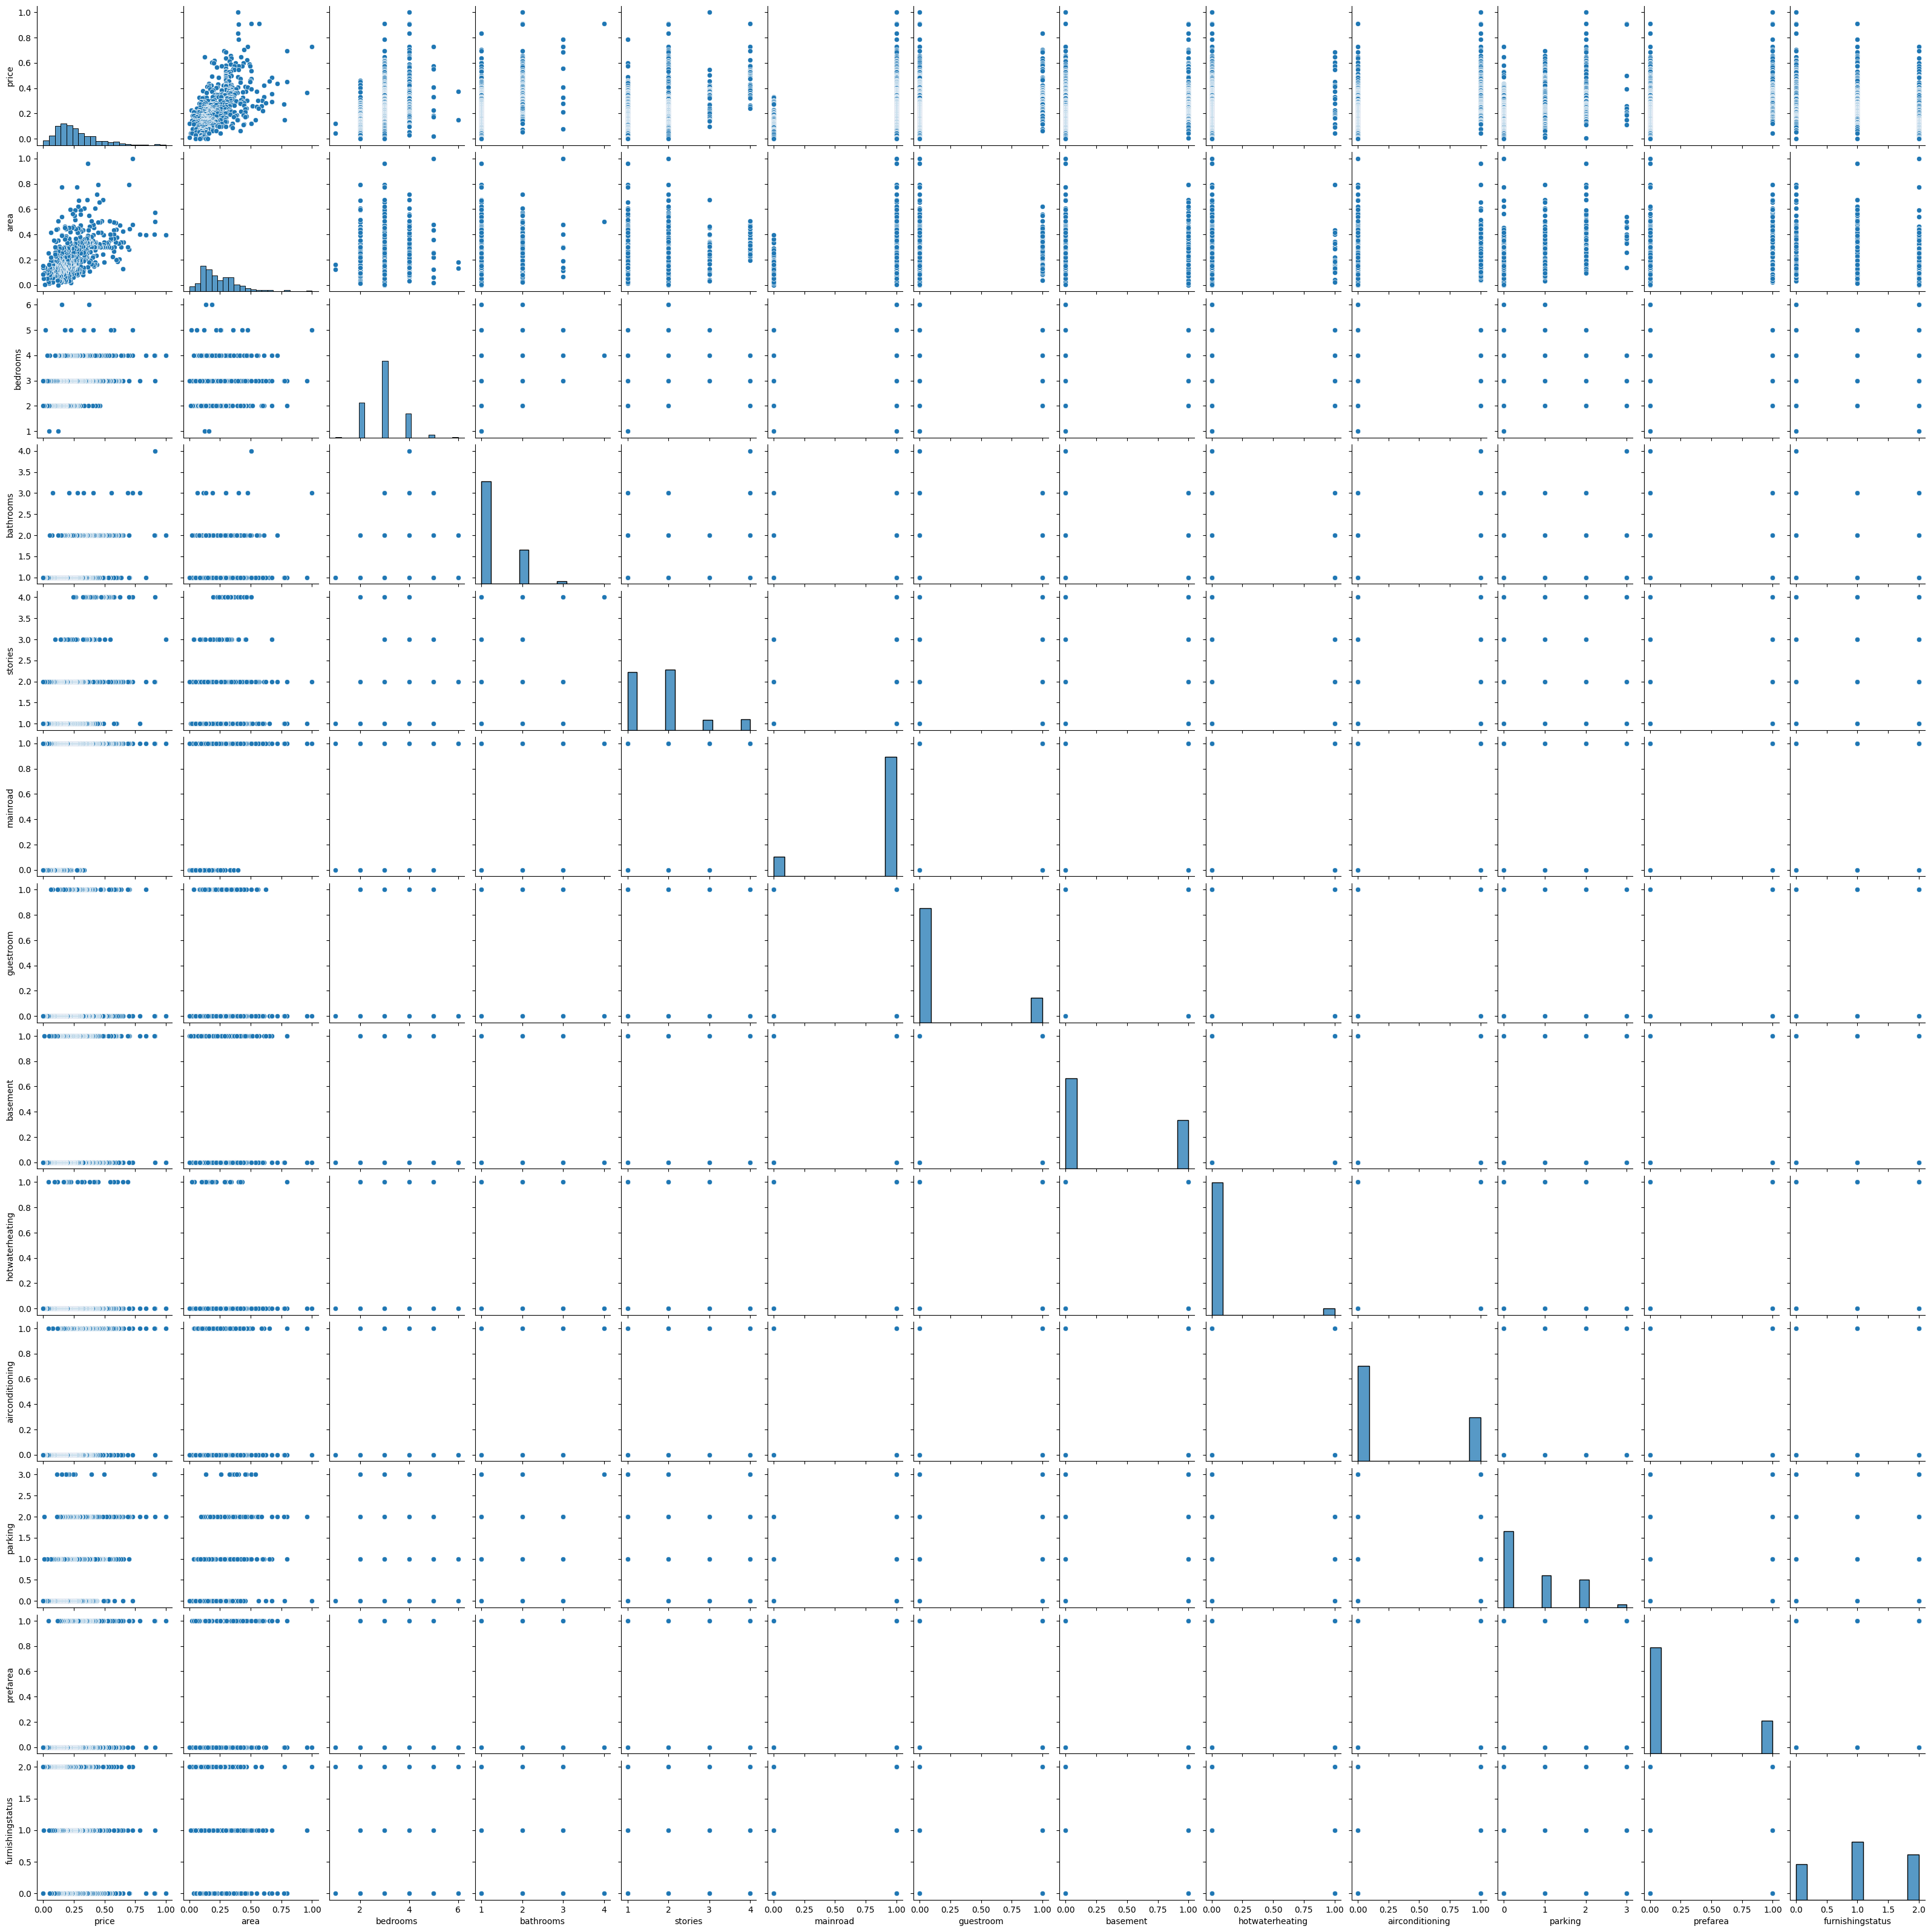

In [316]:
sns.pairplot(data)

<Axes: >

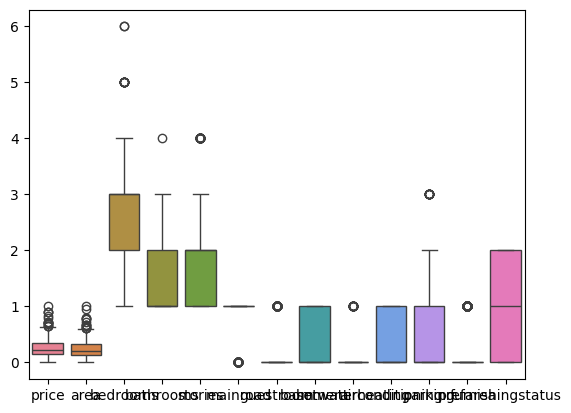

In [327]:
sns.boxplot(data)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'price'),
  Text(1, 0, 'area'),
  Text(2, 0, 'bedrooms'),
  Text(3, 0, 'bathrooms'),
  Text(4, 0, 'stories'),
  Text(5, 0, 'mainroad'),
  Text(6, 0, 'guestroom'),
  Text(7, 0, 'basement'),
  Text(8, 0, 'hotwaterheating'),
  Text(9, 0, 'airconditioning'),
  Text(10, 0, 'parking'),
  Text(11, 0, 'prefarea'),
  Text(12, 0, 'furnishingstatus')])

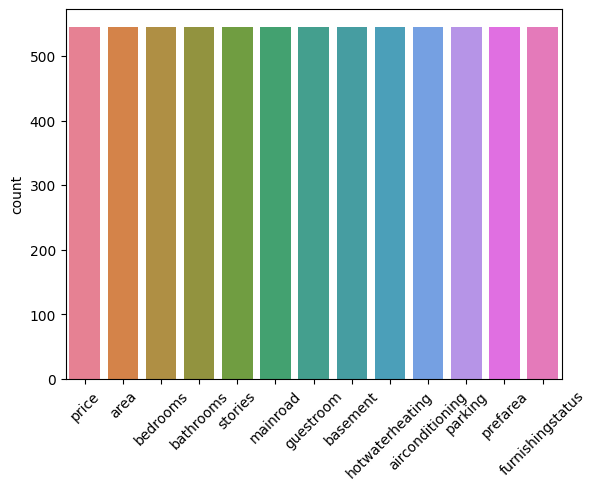

In [335]:
sns.countplot(data=data)
plt.xticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0.5, 0, 'price'),
  Text(1.5, 0, 'area'),
  Text(2.5, 0, 'bedrooms'),
  Text(3.5, 0, 'bathrooms'),
  Text(4.5, 0, 'stories'),
  Text(5.5, 0, 'mainroad'),
  Text(6.5, 0, 'guestroom'),
  Text(7.5, 0, 'basement'),
  Text(8.5, 0, 'hotwaterheating'),
  Text(9.5, 0, 'airconditioning'),
  Text(10.5, 0, 'parking'),
  Text(11.5, 0, 'prefarea'),
  Text(12.5, 0, 'furnishingstatus')])

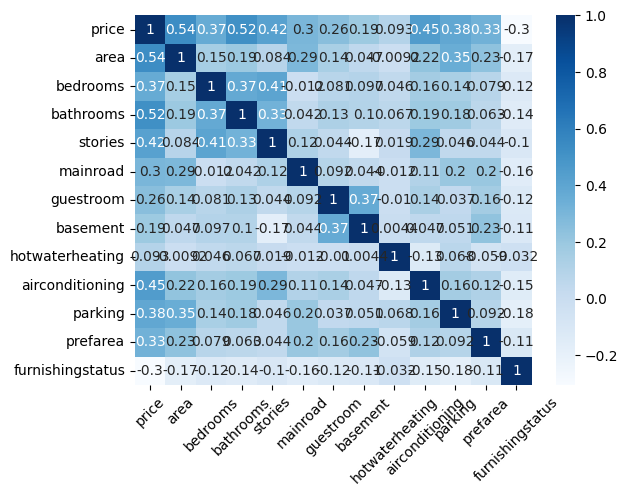

In [329]:
sns.heatmap(data.corr() , cmap='Blues', annot=True)
plt.xticks(rotation =45)

<Axes: xlabel='area', ylabel='price'>

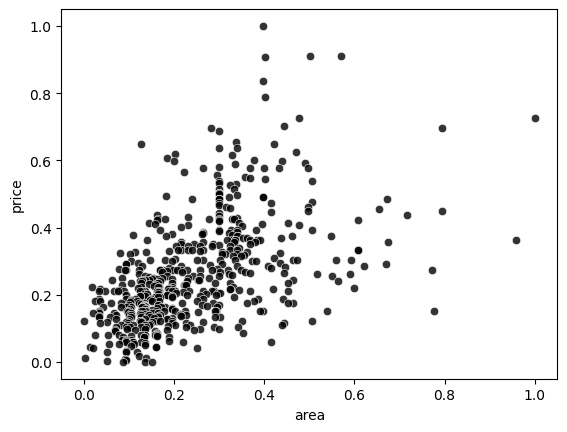

In [333]:
sns.scatterplot(x=data['area'] , y=data['price'] ,color='black' , alpha=0.8)

In [332]:
x = data.drop('price' , axis=1)
y = data.price

In [317]:
define = SelectKBest(score_func=f_regression , k=4)
define.fit_transform(x,y)
mask = define.get_support()
fin = x.columns[mask]

In [318]:
fin

Index(['area', 'bathrooms', 'stories', 'airconditioning'], dtype='object')

In [322]:
X = x[['area','airconditioning','bathrooms','stories']]

In [323]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=43)

In [324]:
lor = LinearRegression()
lor.fit(x_train , y_train)
pred = lor.predict(x_test)
r2_score(y_test , pred)

0.4678213933349452

In [325]:
mean_absolute_error(y_test , pred)

0.08736440497019413

In [326]:
mean_squared_error(y_test , pred)

0.014050485390590922